# Analysis 3

1) The memory usage of the data is around 6.1 mb.How can we reduce the memory usage of the data set?
2) What is the Average price of vehicle by fuel type and gearbox type.Give a plot
3) What is the Average power of a vehicle by vehicle type and gearbox type.Give a plot
4) What is the Average price of a vehicle by brand as well as vehicle type.Use heatmap to explain this


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\anaji\Sowjanya\autos\autosclean.csv",encoding='unicode escape')

In [4]:
df

,Unnamed: 0,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen
0,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163.0,grand,125000,8,diesel,jeep,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
1,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75.0,golf,150000,6,benzin,volkswagen,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
2,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69.0,fabia,90000,7,diesel,skoda,2016-03-31 00:00:00,60437,2016-04-06 10:17:21
3,5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102.0,3er,150000,10,benzin,bmw,2016-04-04 00:00:00,33775,2016-04-06 19:17:07
4,6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109.0,2_reihe,150000,8,benzin,peugeot,2016-04-01 00:00:00,67112,2016-04-05 18:18:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280552,371521,2016-03-27 20:36:20,Opel_Zafira_1.6_Elegance_TÃV_12/16,privat,Angebot,1150,control,bus,2000,manuell,114.0,zafira,150000,3,benzin,opel,2016-03-27 00:00:00,26624,2016-03-29 10:17:23
280553,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101.0,fortwo,125000,3,benzin,smart,2016-03-05 00:00:00,26135,2016-03-11 18:17:12
280554,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102.0,transporter,150000,3,diesel,volkswagen,2016-03-19 00:00:00,87439,2016-04-07 07:15:26
280555,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100.0,golf,150000,6,diesel,volkswagen,2016-03-20 00:00:00,40764,2016-03-24 12:45:21


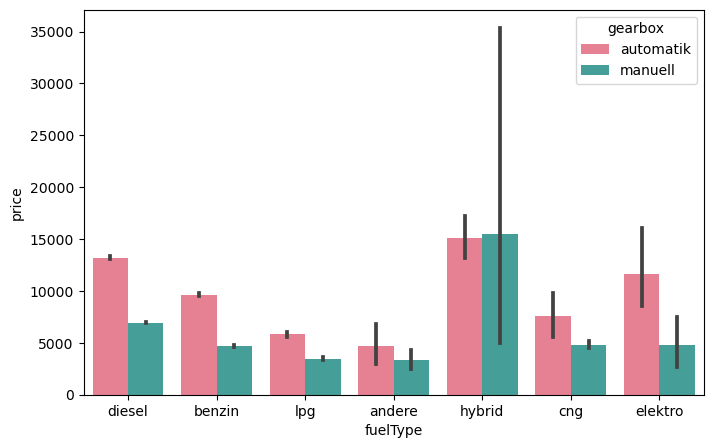

In [7]:
average_price = df.groupby(['fuelType', 'gearbox'])['price'].mean()
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="fuelType", y="price",hue="gearbox", palette="husl",data=df)
plt.show()


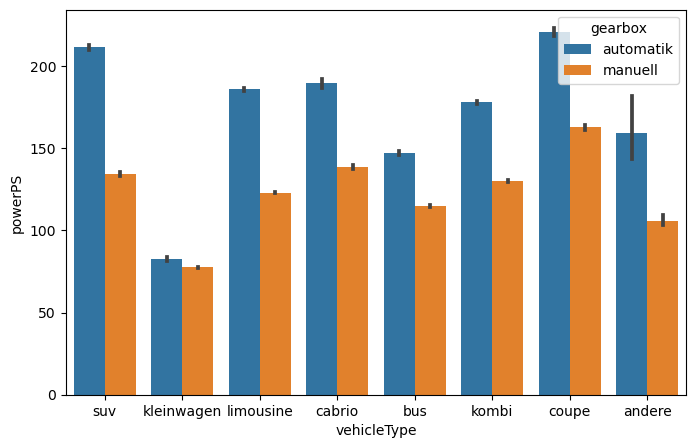

In [8]:
average_price = df.groupby(['vehicleType', 'gearbox'])['powerPS'].mean()
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="vehicleType", y="powerPS",hue="gearbox",data=df)
plt.show()

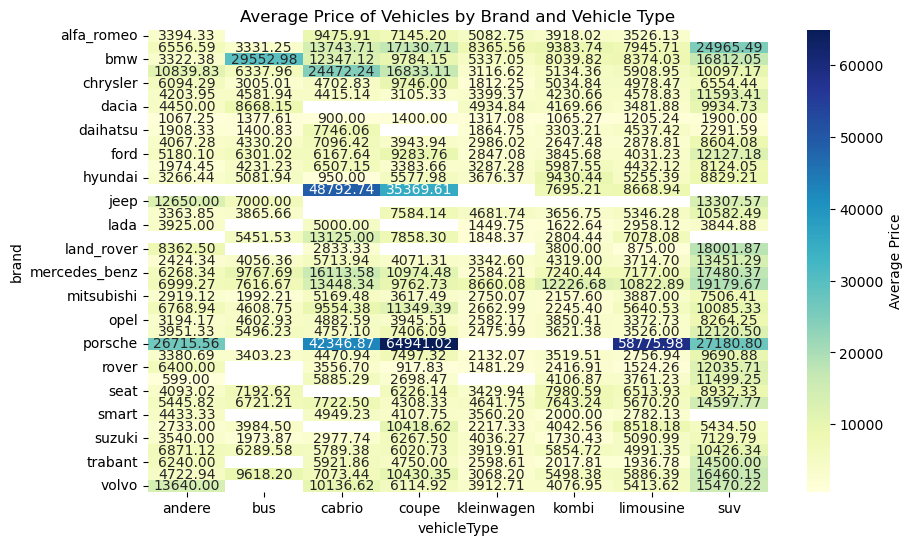

In [12]:
average_price = df.groupby(['brand', 'vehicleType'])['price'].mean().reset_index()

pivot_table = average_price.pivot(index= 'brand', columns='vehicleType', values='price')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Average Price'})

plt.title('Average Price of Vehicles by Brand and Vehicle Type')
plt.xlabel('vehicleType')
plt.ylabel('brand')

plt.show()